In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import shuffle

In [ ]:
TRAIN_DIR = "/content/Train"
TEST_DIR =  "/content/Test"

In [ ]:
IMG_SIZE = 120
MODEL_NAME = "NIKEvsADIDAS"

In [ ]:
def label_image(img):
    word_label = img.split('.')[0]
    if word_label == 'nike': return [1,0]
    elif word_label == 'adidas': return [0,1]


In [ ]:
train_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
  label = label_image(img)
  path = os.path.join(TRAIN_DIR,img)

  # PIL
  img = Image.open(path)
  img = img.convert('L')
  img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
  #Create composite image by blending images using a transparency mask. ..
  # ANTIALIAS (a high-quality downsampling filter).

  train_data.append([np.array(img), np.array(label)])

shuffle(train_data)

  4%|▍         | 18/460 [00:00<00:02, 175.01it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 460/460 [00:02<00:00, 158.42it/s]


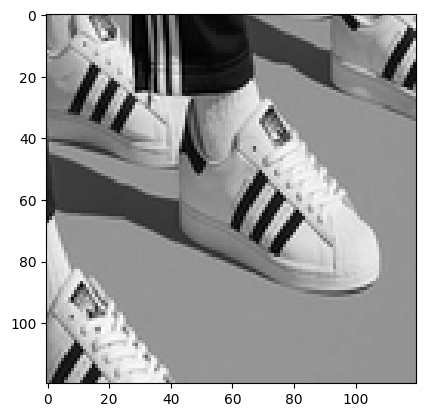

In [ ]:
plt.imshow(train_data[35][0], cmap='gist_gray')
plt.show()

In [ ]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape=(120,120,1)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax')) #adidas or nike 2 options so last layer has 2 neurons.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array([np.argmax(i[1]) for i in train_data]) # Convert one-hot encoded labels to integers

model.fit(x,y,epochs=10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.8543 - loss: 0.4424
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
   # Preprocess the test image
img = Image.open('/content/adidas.jpg')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)

# Normalize and reshape
img_array = np.array(img) / 255.0  # Normalize pixel values
img_array = img_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Make prediction
prediction = model.predict(img_array)

# Label mapping
CATEGORIES = ["Nike", "Adidas"]

# Print prediction
predicted_label = CATEGORIES[np.argmax(prediction)]
print("Predicted label:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted label: Nike


In [ ]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


array([[1., 0.]], dtype=float32)